In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

# Finger 1

Básicamente vamos a buscar algunas métricas sobre el set de datos.

In [121]:
df = pd.read_csv('data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Evento predominante del set de datos
Vamos a ver la frencuencia con la que aparece cada evento en la columna `event`. Para esto primero verificaremos que efectivamente la columna `event` no posee valores nulos.

In [122]:
events = df['event']
print(events.size == events.count())

True


In [123]:
events_vc = df['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0,0.5,'Evento')

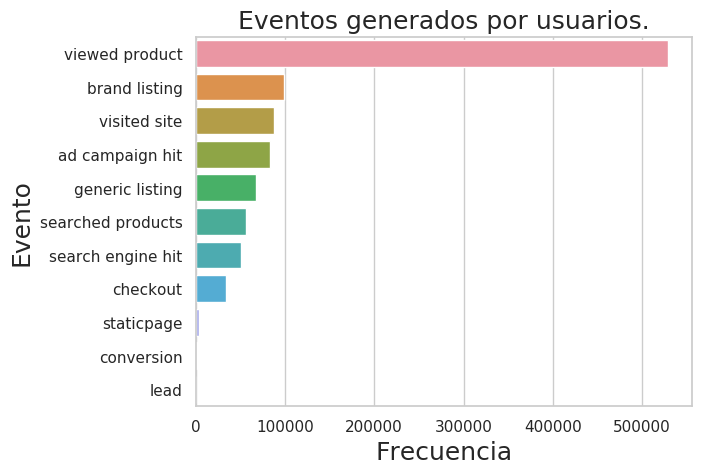

In [124]:
g = sns.barplot(x=events_vc.values, y=events_vc.index)
g.set_title("Eventos generados por usuarios.", fontsize=18)
g.set_xlabel("Frecuencia", fontsize=18)
g.set_ylabel("Evento", fontsize=18)

Claramente se puede observar que el evento predominante es `viewed product`.

# Top 5 productos comprados.

Filtramos los datos por event y sku, ya que es lo que nos interesará ver a mayor profundidad.

In [125]:
products = df[['event', 'sku']]
products.head()

,event,sku
0,ad campaign hit,NaN
1,visited site,NaN
2,viewed product,2694.0
3,checkout,2694.0
4,viewed product,15338.0


In [126]:
# Ahora filtramos por conversion, para poder calcular el top 5 de productos comprados.
products = products[products['event'] == 'conversion']
products.head()

,event,sku
220,conversion,3084.0
2282,conversion,6650.0
2547,conversion,3348.0
4245,conversion,2694.0
6985,conversion,6357.0


Podemos enfocarnos en los productos únicamente, así que haremos eso.

In [127]:
products = products['sku']

También vamos a revisar si hay sku faltantes para descartarlos, de forma sencilla.

In [128]:

print(products.size == products.count())

True


Finalmente procedemos a contar la frecuencia y ver el top 5 de productos comprados.

In [129]:
products_top5 = products.value_counts().head(5)
products_top5

6371.0    30
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: sku, dtype: int64

Procedemos a plotear otro gráfico de barras para plasmar visualmente dicho top 5.

Text(0,0.5,'Frecuencia ')

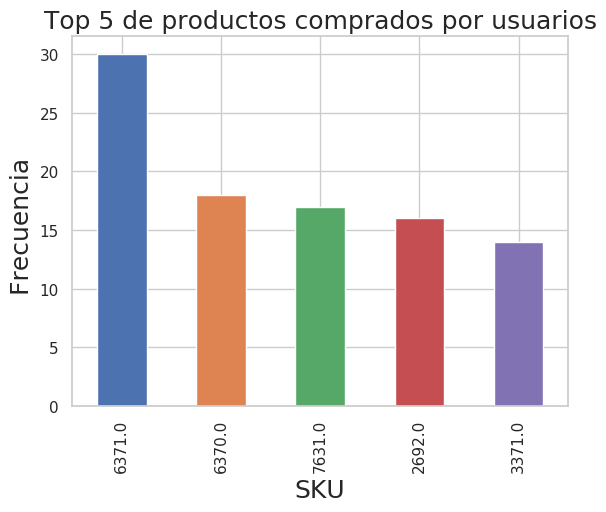

In [130]:
g = products_top5.plot.bar()
g.set_title("Top 5 de productos comprados por usuarios", fontsize=18)
g.set_xlabel("SKU", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

# Top 10 usuarios con mayor registro de eventos

Ahora vamos a buscar los 10 usuarios más activos del sitio, no hace falta revisar que `event` no contenga nulos ya que ya hicimos esto anteriormente.

In [115]:
users = df['person']
users_top10 = users.value_counts().head(10)
users_top10

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

Text(0,0.5,'Frecuencia ')

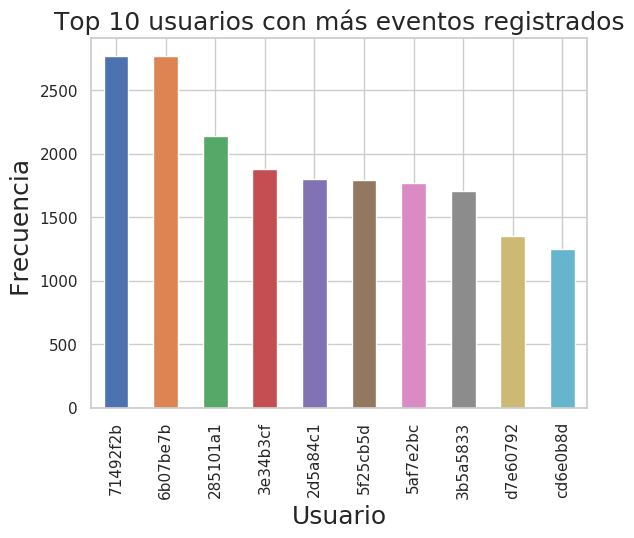

In [117]:
g = users_top10.plot.bar()
g.set_title("Top 10 usuarios con más eventos registrados", fontsize=18)
g.set_xlabel("Usuario", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)